In [2]:
import os
workspace = "/workspace"
os.chdir(workspace)

import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from tqdm import tqdm
from glob import glob

from collections import OrderedDict
from scipy.signal import spectrogram
from mne.time_frequency import tfr_array_morlet
from src import read_config, plot_single_channel, plot_topomap, show_morlet

In [3]:
data = torch.load("data/EEG_ImageNet/preprocessing/5-95/multiquadric/noiseless_norm.pth")

In [4]:
n = 4560

lr = data["LR"]["train"][n][0, 0].numpy()
hr = data["HR"]["train"][n][0, 0].numpy()
lr.shape

(128, 440)

In [5]:
df = pd.read_csv("data/EEG_ImageNet/ch_name.csv")
ch_names = list(df["ch_name"])

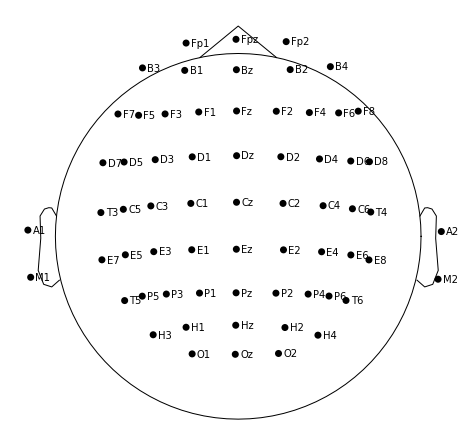

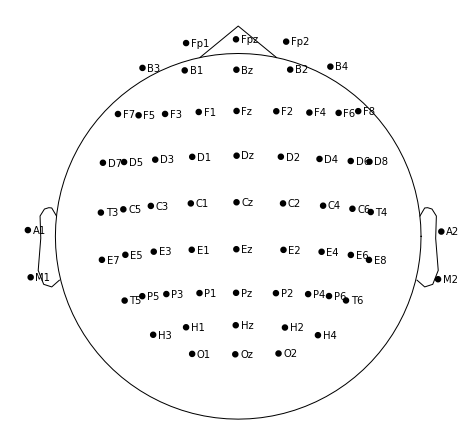

In [6]:
montage = mne.channels.make_standard_montage('standard_alphabetic')
montage.plot()

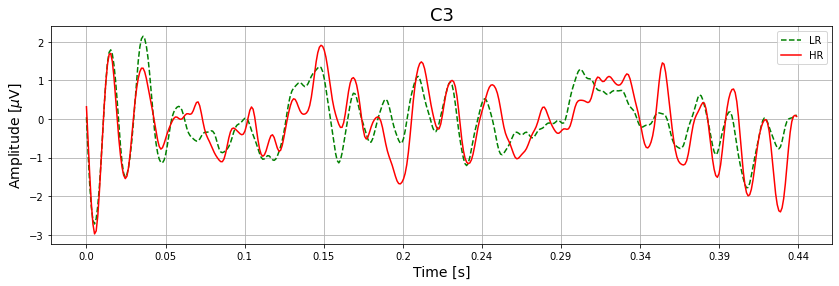

In [11]:
n = 30
time_len = lr.shape[-1]
sfreq = 1000
ch_name = ch_names[n]

plot_single_channel(
    lr_eeg = lr[n],
    hr_eeg = hr[n],
    time_len = time_len,
    sfreq = sfreq,
    ch_name = ch_name
)

In [12]:
info = mne.create_info(ch_names, 1000, ch_types = "eeg")

In [13]:
montage = read_config("data/Montage/128_ch_system.pkl")
montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 128 channels>

In [14]:
lr_eeg = mne.EvokedArray(lr, info)
lr_eeg.set_montage(montage)

hr_eeg = mne.EvokedArray(hr, info)
hr_eeg.set_montage(montage)

Condition,
Data kind,average
Timepoints,440 samples
Channels,128 channels
Number of averaged epochs,1
Time range (secs),0.0 – 0.439
Baseline (secs),off


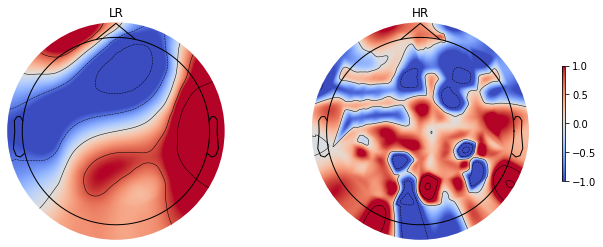

In [15]:
raw_eeg = {"LR": lr_eeg, "HR": hr_eeg}

plot_topomap(raw_eeg, figsize = (10, 4))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


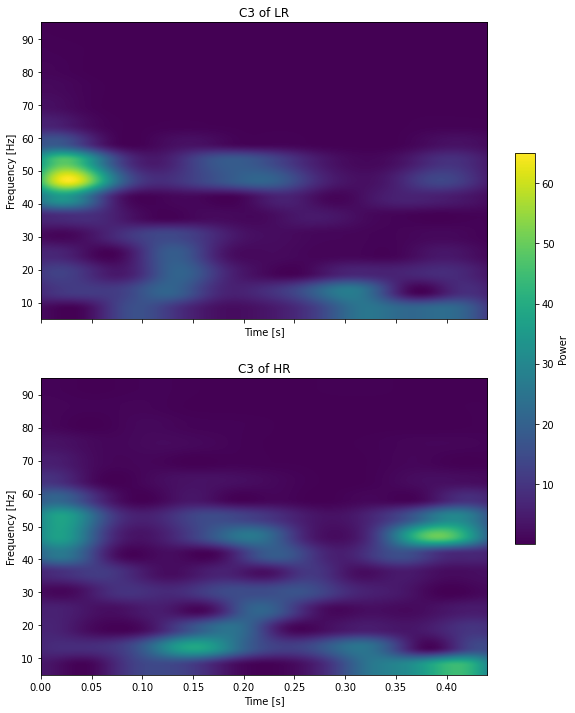

In [102]:
n = 30

lr_data = lr_eeg.copy().pick_channels([ch_names[n]])
hr_data = hr_eeg.copy().pick_channels([ch_names[n]])
freqs = np.linspace(5, 95, 16)

show_morlet({"LR": lr_data, "HR": hr_data}, freqs, cmap = "viridis")